In [7]:
import torch
from transformers import AutoTokenizer, AutoModel
from infer_utils import load_image

c:\Users\User\Desktop\side_project\vlm\scatterplot_reader\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [1]:
from db_simulator import DataSetGenerator
datagen = DataSetGenerator(num_figure=10, save_dir = "testdb_high")
datagen.save()

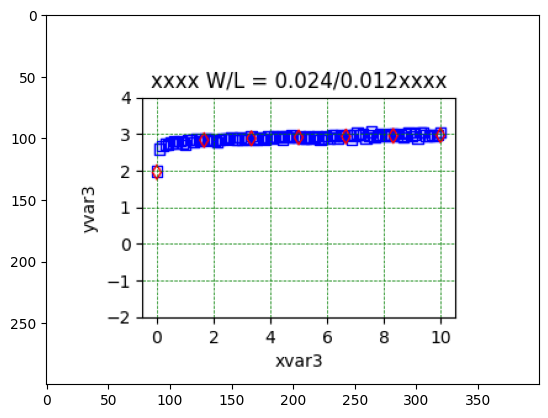

In [33]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [31]:
img = np.array(Image.open("testdb_small_slope/testcase_6.png").convert('RGB'))
# factor = 128
# quant_img = (np.array(img)// factor) * factor
#(img == [255, 0, 0]).shape
red_pixels = (img[:, :, 0] < 100) & (img[:, :, 1] < 100) & (img[:, :, 2] > 150)
#img.reshape(-1, img.shape[2]).shape
red_positions = np.column_stack(np.where(red_pixels))

# Display the red positions
print("Red pixel positions:", red_positions)
pd.DataFrame(red_positions).iloc[:, 1].unique()

Red pixel positions: [[ 91 260]
 [ 91 261]
 [ 91 262]
 ...
 [132  92]
 [132  93]
 [132  94]]


array([260, 261, 262, 263, 264, 265, 266, 267, 268, 248, 249, 250, 251,
       252, 253, 254, 255, 256, 257, 290, 291, 292, 293, 294, 295, 296,
       297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309,
       310, 316, 317, 318, 321, 322, 323, 324, 258, 259, 269, 270, 271,
       272, 273, 275, 276, 277, 278, 279, 283, 284, 285, 286, 287, 288,
       289, 195, 196, 197, 198, 199, 200, 201, 202, 203, 229, 230, 231,
       232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 245, 246, 247,
       311, 312, 313, 314, 315, 162, 163, 164, 168, 169, 170, 171, 176,
       177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190,
       191, 192, 193, 194, 207, 208, 209, 210, 211, 212, 213, 214, 215,
       216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 243,
       281, 319, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 172, 173, 174, 175, 182, 204, 205, 228,
       242, 274, 280, 282, 320, 118, 121, 122, 125, 133, 140, 14

In [16]:
# Find the unique colors in the array
factor = 128
quant_img = (np.array(img)// factor) * factor
unique_colors = np.unique(quant_img.reshape(-1, quant_img.shape[2]), axis=0)

# Display the unique colors
print(unique_colors)

[[  0   0   0]
 [  0   0 128]
 [  0 128   0]
 [  0 128 128]
 [128   0   0]
 [128   0 128]
 [128 128 128]]


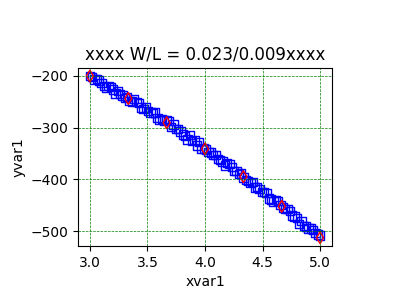

In [7]:
img = Image.open("testdb/testcase_6.png").convert('RGB')
gray_img = img.convert('L')
axis0 = np.mean((np.array(gray_img) == 0), axis = 0)
axis1 = np.mean((np.array(gray_img) == 0), axis = 1)
img

In [16]:
generation_config = dict(max_new_tokens=1024, do_sample=False)
background = "On the chart, there's a large cluster of square-shaped points and a diamond-shape point with different color"
sp_prompt = "Your task is to extract the concepts involved in solving the problem"
prompt = f"Question :{background} Does the diamond point higher, slightly higher, lower, slightly lower or overlapping with the square points?\n{sp_prompt}"
analyse_response = model.chat(tokenizer, None, prompt, generation_config)

In [17]:
print(analyse_response)

To solve this problem, we need to analyze the positions of the square-shaped points and the diamond-shaped point on the chart. Here are the steps to extract the concepts involved:

1. Identify the positions of the square-shaped points:
   - Locate the cluster of square-shaped points on the chart.
   - Note the coordinates or position of the square points.

2. Identify the position of the diamond-shaped point:
   - Locate the diamond-shaped point on the chart.
   - Note the coordinates or position of the diamond point.

3. Compare the positions of the square-shaped points and the diamond-shaped point:
   - Determine if the diamond point is higher, slightly higher, lower, slightly lower, or overlapping with the square points.

4. Analyze the relative positions:
   - If the diamond point is above the square points, it is higher.
   - If the diamond point is above the square points but not as high as the highest square point, it is slightly higher.
   - If the diamond point is below the sq

In [3]:
from PIL import Image, ImageDraw 
import numpy as np
from copy import deepcopy
import os 
import pandas as pd

def create_masked_images(img, split_num = 7):
    gray_img = img.convert('L')
    axis0 = np.mean((np.array(gray_img) == 0), axis = 0)
    axis1 = np.mean((np.array(gray_img) == 0), axis = 1)
    x0, x1 = np.sort(np.argsort(axis0)[-2:]).tolist()
    y0, y1 = np.sort(np.argsort(axis1)[-2:]).tolist()
    start_end_idx = np.linspace(x0, x1, num=split_num+1).astype(int).tolist() 
    masked_area_tuples = list(zip(start_end_idx[:-1], start_end_idx[1:])) ### [(x0, x1), (x1, x2), ...]

    masked_image_dict = {}
    for idx, keep_masked_area in enumerate(masked_area_tuples):
        masked_image = deepcopy(img)
        for mask in masked_area_tuples:
            if mask != keep_masked_area:
                mask_x0, mask_x1 = mask
                if mask_x0 == x0:
                    mask_x0 += 1 # keep the boundary of chart
                if mask_x1 == x1:
                    mask_x1 += 1 # keep the boundary of chart
                draw = ImageDraw.Draw(masked_image)   
                draw.rectangle((mask_x0, y0+1, mask_x1, y1-1), fill ="white", outline=None) 
        masked_image_dict.update({idx : masked_image})

    return masked_image_dict
    


In [4]:
def create_width_masked_images(img, split_num = 7, width = 8):
    gray_img = img.convert('L')
    axis0 = np.mean((np.array(gray_img) == 0), axis = 0)
    axis1 = np.mean((np.array(gray_img) == 0), axis = 1)
    x0, x1 = np.sort(np.argsort(axis0)[-2:]).tolist()
    y0, y1 = np.sort(np.argsort(axis1)[-2:]).tolist()
    start_end_idx = np.linspace(x0, x1, num=split_num+1).astype(int).tolist() 
    masked_area_tuples = list(zip(start_end_idx[:-1], start_end_idx[1:])) ### [(x0, x1), (x1, x2), ...]

    masked_image_dict = {}
    for idx, keep_masked_area in enumerate(masked_area_tuples):
        masked_image = deepcopy(img)
        mask_x0, mask_x1 = keep_masked_area
        centerx = (mask_x0 + mask_x1)/2 - 2
        draw = ImageDraw.Draw(masked_image)   
        draw.rectangle((x0+1, y0+1, centerx-width, y1-1), fill ="white", outline=None) 
        draw.rectangle((centerx + width, y0+1, x1-1, y1-1), fill ="white", outline=None) 
        # for mask in masked_area_tuples:
        #     if mask != keep_masked_area:
        #         mask_x0, mask_x1 = mask
        #         if mask_x0 == x0:
        #             mask_x0 += 1 # keep the boundary of chart
        #         if mask_x1 == x1:
        #             mask_x1 += 1 # keep the boundary of chart
        #         draw = ImageDraw.Draw(masked_image)   
        #         draw.rectangle((mask_x0, y0+1, mask_x1, y1-1), fill ="white", outline=None) 
        masked_image_dict.update({idx : masked_image})

    return masked_image_dict

In [11]:
img = Image.open("testdb_small_slope/testcase_0.png").convert('RGB')
mask_dict = create_width_masked_images(img, split_num = 7, width = 6)

In [ ]:
np.array(img

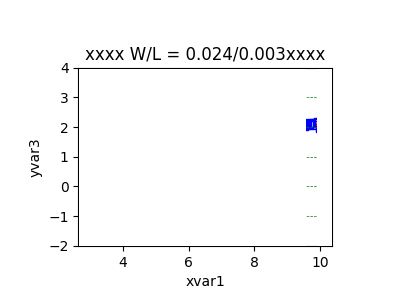

In [17]:
mask_dict[6]

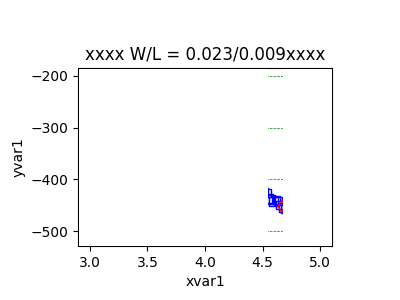

In [71]:
mask_dict[5]

In [9]:
path = "./InternVL2-4B"
tokenizer = AutoTokenizer.from_pretrained(path, trust_remote_code=True, use_fast=False)
#generation_config = dict(max_new_tokens=1024, do_sample=False)

model = AutoModel.from_pretrained(
    path,
    torch_dtype=torch.bfloat16,
    low_cpu_mem_usage=True,
    use_flash_attn=True,
    trust_remote_code=True).eval().cuda()

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Loading checkpoint shards: 100%|██████████| 2/2 [00:00<00:00,  9.93it/s]


In [14]:
# tmp_path = "tmp"
# os.makedirs(tmp_path, exist_ok=True)
# image_name = "testcase_1"
# img = Image.open(f"testdb/{image_name}.png").convert('RGB')
# masked_image_dict = create_masked_images(img, split_num=21)
# for idx, mask_img in masked_image_dict.items():
#     mask_img.save(f"{tmp_path}/{image_name}_masked_{idx}.png")

In [8]:
class RelationQA:
    def __init__(self, model, tokenizer, image_path, manual_masked_path = None, split_num = 7, debug = False):
        self.chat_hist = []
        self.debug = debug
        self.image_name = os.path.basename(image_path)
        self.model = model
        self.generation_config  = dict(max_new_tokens=2048, do_sample=False)
        self.tokenizer = tokenizer
        self.relation_q = "Does the {} diamond point higher, slightly higher, lower, slightly lower or overlapping with the {} square points?"
        self.prompts = {
            "background_info" : "On the chart, there's a large cluster of square-shaped points and fewer diamond-shape points with different color",
            "short_ans" : "Answer the question using a single word or phrase.",
            "options" : "Option(A){}, Option(B){}, Option(C){}, Option(D){}, Option(E){}\nAnswer with the option’s letter from the given choices directly."
        }
        self.img, self.mask_image_dict = self.preprocess(image_path, split_num, manual_masked_path)
        self.color_info = self.get_color_info()
        
    def preprocess(self, image_path, split_num, manual_masked_path = None):
        img = Image.open(image_path).convert('RGB')

        if manual_masked_path is None:
            masked_image_dict = create_masked_images(img, split_num)
            if self.debug:
                tmp_path = "tmp_small_slope2"
                os.makedirs(tmp_path, exist_ok=True)
                for idx, mask_img in masked_image_dict.items():
                    mask_img.save(f"{tmp_path}/{self.image_name}_masked_{idx}.png")
        else:
            masked_image_dict = {}
            for idx, filename in enumerate(os.listdir(manual_masked_path)):
                masked_img = Image.open(f"{manual_masked_path}/{filename}").convert('RGB')
                masked_image_dict.update({idx : masked_img})            
        return img, masked_image_dict

    def get_question(self, **kwargs): 
        '''
        kwargs must be in order instruction, question, ans format
        '''
        q = "<image>\n"
        for key, value in kwargs.items():
            if key != "ans_format" :
                q += f"{key}: {value}\n"
            else:
                q += f"{value}\n"

        return q

    #
    def get_color_info(self):
        color_q = "What is the color of {} points?"
        color_dict = {}
        pixel_values = load_image(self.img, max_num=12).to(torch.bfloat16).cuda()
        for shape in ["square", "diamond"]:
            q = self.get_question(Instruction = self.prompts["background_info"],
                                Question =color_q.format(shape), 
                                ans_format = self.prompts["short_ans"])
            response = self.model.chat(self.tokenizer, pixel_values, 
                                    q, self.generation_config)
            if self.debug :
                hist = f'User: {q}\nAssstant: {response}'
                self.chat_hist.append(hist)
                print(hist)
            color_dict.update({shape:response})
        return color_dict 

    # maybe masked image might not exist both diamond and square points
    def check_points_exist(self, pixel_values):
        check_q = "Do any {} {} points exist?" # color, shape
        for shape, color in self.color_info.items():
            q = self.get_question(Question =check_q.format(color, shape), 
                                ans_format = self.prompts["short_ans"] + "Yes or No") 
            response = model.chat(tokenizer, pixel_values, q, self.generation_config)
            if self.debug :
                hist = f'User: {q}\nAssstant: {response}'
                self.chat_hist.append(hist)
                print(hist)

            if "No" in response:
                return False
        return True

    # Directly ask Options will leads bad performance
    def get_masked_ans(self, mask_img):
        pixel_values = load_image(mask_img, max_num=12).to(torch.bfloat16).cuda()
        #if self.check_points_exist(pixel_values):
        #Instruction = analyse_response, 
        final_q = self.get_question(Question = self.relation_q.format("red", "blue")) #self.color_info["diamond"], self.color_info["square"]))
                                #ans_format = self.prompts["options"].format('higher', 'slightly higher', 'lower', 'slightly lower','overlapping with'))
        response = self.model.chat(self.tokenizer, pixel_values, final_q, self.generation_config)
        summary_q = self.get_question(Instruction = response, Question = final_q, 
                    ans_format = self.prompts["options"].format('higher', 'slightly higher', 'lower', 'slightly lower','overlapping with'))
        option = model.chat(tokenizer, None, summary_q, self.generation_config)
        if self.debug :
            hist = f'User: {final_q}\nOption{option}\nAssstant: {response}'
            self.chat_hist.append(hist)
            print(hist)
        return response, option

        #return "Not Exists Both Points", "Not Exists Both Points"

    def inference(self, save_dir = None):
        ans_set = {}
        for idx, mask_img in self.mask_image_dict.items():
            ans, option = self.get_masked_ans(mask_img)
            print(f"idx {idx}, ans {ans}")
            ans_set.update({idx : {"Option" : option, "full_ans" : ans}})
        if save_dir is not None:
            self.save_result(ans_set, save_dir)
                
        return ans_set

    def save_result(self, ans_set, save_dir):
        os.makedirs(save_dir, exist_ok=True)
        pd.DataFrame.from_dict(ans_set, orient='index').to_csv(f"{save_dir}/{self.image_name}.csv")
        if len(self.chat_hist) > 0:
            with open(f'{save_dir}/{self.image_name}_chat_hist.txt', 'a') as file:
                file.write("\n".join(self.chat_hist))
    #def get_prob(self)
    

In [21]:
q = f"Instruction : {background}\nQuestion : Do the blue square points higher, slightly higher, lower, slightly lower or overlapping with the red diamond points?\nPlease analysis in detail:"
pixel_values = load_image("testdb_high/testcase_0.png", max_num=12).to(torch.bfloat16).cuda()
generation_config  = dict(max_new_tokens=2048, do_sample=False)
res = model.chat(tokenizer, pixel_values, q, generation_config)
print(res)


The blue square points are consistently at a higher value on the y-axis compared to the red diamond points. The blue squares are clustered around the value of 2 on the y-axis, while the red diamond points are clustered around the value of 4. Therefore, the blue square points are lower than the red diamond points.


In [6]:
rel_qa = RelationQA(model, tokenizer, f"testdb_small_slope_2/testcase_0.png", split_num = 7, debug = True)
rel_qa.color_info
ans_set = rel_qa.inference("result_small_slope2_split_7")

User: <image>
Instruction: On the chart, there's a large cluster of square-shaped points and fewer diamond-shape points with different color
Question: What is the color of square points?
Answer the question using a single word or phrase.

Assstant: Blue
User: <image>
Instruction: On the chart, there's a large cluster of square-shaped points and fewer diamond-shape points with different color
Question: What is the color of diamond points?
Answer the question using a single word or phrase.

Assstant: Red
User: <image>
Question: Does the red diamond point higher, slightly higher, lower, slightly lower or overlapping with the blue square points?

OptionB
Assstant: The red diamond point is slightly higher than the blue square point.
idx 0, ans The red diamond point is slightly higher than the blue square point.
User: <image>
Question: Does the red diamond point higher, slightly higher, lower, slightly lower or overlapping with the blue square points?

OptionB
Assstant: The red diamond point

In [33]:
save_dir = "result_split_7"
for filename in os.listdir("testdb"):
    if ("png" in filename) and (f"{filename}.csv" not in os.listdir(save_dir)):
        print(f"------ Start inference {filename} ------")
        rel_qa = RelationQA(model, tokenizer, f"testdb/{filename}", split_num = 7, debug = True)
        rel_qa.color_info
        ans_set = rel_qa.inference(save_dir)

------ Start inference testcase_1.png ------
User: <image>
Instruction: On the chart, there's a large cluster of square-shaped points and fewer diamond-shape points with different color
Question: What is the color of square points?
Answer the question using a single word or phrase.

Assstant: Blue
User: <image>
Instruction: On the chart, there's a large cluster of square-shaped points and fewer diamond-shape points with different color
Question: What is the color of diamond points?
Answer the question using a single word or phrase.

Assstant: Red
User: <image>
Question: Do any Blue square points exist?
Answer the question using a single word or phrase.Yes or No

Assstant: Yes
User: <image>
Question: Do any Red diamond points exist?
Answer the question using a single word or phrase.Yes or No

Assstant: Yes
User: <image>
Question: Does the Red diamond point higher, slightly higher, lower, slightly lower or overlapping with the Blue square points?

OptionD
Assstant: The Red diamond point 

KeyboardInterrupt: 

In [20]:
import pandas as pd
pd.DataFrame.from_dict(ans_set, orient='index').to_csv("tmp.csv")

In [14]:
q_orig = "Does the {} diamond point higher, slightly higher, lower, slightly lower or overlapping with the {} square points?".format("red", "blue")
option_prompt = "Option(A){}, Option(B){}, Option(C){}, Option(D){}, Option(E){}\nAnswer with the option’s letter from the given choices directly.".format('higher', 'slightly higher', 'lower', 'slightly lower','overlapping with')
for idx, ans in ans_set.items():
    question = f"Instruction:{ans}, Question : {q_orig}\n{option_prompt}"
    response = model.chat(tokenizer, None, question, rel_qa.generation_config)
    print(f"idx {idx} response {response}")


idx 0 response D
idx 1 response C
idx 2 response D
idx 3 response D
idx 4 response D
idx 5 response D
idx 6 response D


User: <image>
Question: Do any Blue square points exist?
Answer the question using a single word or phrase.Yes or No

Assstant: Yes
User: <image>
Question: Do any Red diamond points exist?
Answer the question using a single word or phrase.Yes or No

Assstant: Yes
User: <image>
Question: Does the Red diamond point higher, slightly higher, lower, slightly lower or overlapping with the Blue square points?

Assstant: The red diamond point is slightly lower than the blue square points.
idx 0, ans The red diamond point is slightly lower than the blue square points.
User: <image>
Question: Do any Blue square points exist?
Answer the question using a single word or phrase.Yes or No

Assstant: Yes
User: <image>
Question: Do any Red diamond points exist?
Answer the question using a single word or phrase.Yes or No

Assstant: Yes
User: <image>
Question: Does the Red diamond point higher, slightly higher, lower, slightly lower or overlapping with the Blue square points?

Assstant: The red diamond p

In [7]:
background_info = "On the chart, there's a large cluster of square-shaped points and fewer diamond-shape points with different color"
pixel_values = load_image(f'./testdb/testcase_1.png', max_num=12).to(torch.bfloat16).cuda()

short_ans_prompt = "Answer the question using a single word or phrase."
color_ans = "What is the color of {} points?"
color_dict = {}
for shape in ["square", "diamond"]:
    question = f'<image>\nInstruct:{background_info}\nQuestion: {color_ans.format(shape)}\n{short_ans_prompt}'
    response = model.chat(tokenizer, pixel_values, question, generation_config)
    color_dict.update({shape:response})

print(f'User: {question}\nAssstant: {color_dict}')

User: <image>
Instruct:On the chart, there's a large cluster of square-shaped points and fewer diamond-shape points with different color
Question: What is the color of diamond points?
Answer the question using a single word or phrase.
 Assstant: {'square': 'Blue', 'diamond': 'Red'}


In [122]:
# set the max number of tiles in `max_num`
background_info = "On the chart, there's a large cluster of square-shaped points and fewer diamond-shape points with different color"





pixel_values = load_image(f'./{tmp_path}/testcase_1_masked_2.png', max_num=12).to(torch.bfloat16).cuda()
ques_1 = "Is there any red diamond point?"
ques_orig = "Does the diamond point higher, slightly higher, lower, slightly lower or overlapping with the square points?"
option = ""

question = '<image>\nPlease describe the image shortly.'
question = '<image>\nWhat is the title of the scatterplot?'
question = f'<image>\nQuestion: {ques_1}'
response = model.chat(tokenizer, pixel_values, question, generation_config)

print(f'User: {question}\nAssistant: {response}')

User: <image>
Question: Is there any red diamond point ?
Assistant: No, there is no red diamond point.


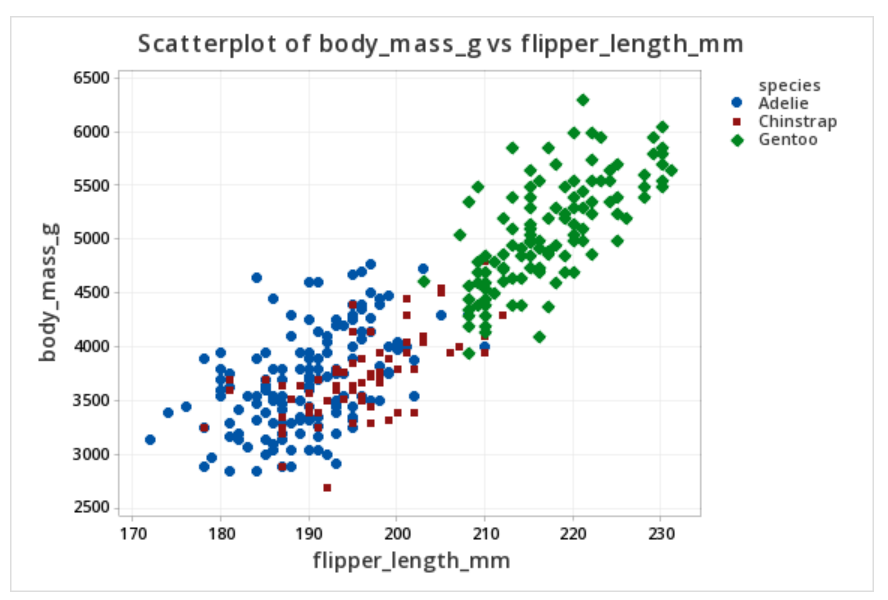

In [6]:
from PIL import Image

image = Image.open('./DB/test1.png')
image